# Predicting Housing Prices: Linear Regression Assumptions

- Load in and create regression model for house sale price data.

In [22]:
import numpy as np
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
import math
from scipy import stats
import statsmodels.api as sm
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'houseprices'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))
housing_df = pd.read_sql_query('select * from houseprices',con=engine)

# no need for an open connection, as we're only doing a single query
engine.dispose()

In [8]:
df_int = housing_df.select_dtypes(include=['float64','int'])
    
for col in df_int:
    housing_df = housing_df[((housing_df[col] - housing_df[col].mean()) / housing_df[col].std()).abs() < 3] 


In [9]:
housing_reg_df =  housing_df.copy()
housing_reg_df = pd.concat([housing_reg_df,pd.get_dummies(housing_reg_df.centralair, 
                                                            prefix="centralair", drop_first=True)], axis=1)
housing_reg_df = pd.concat([housing_reg_df,pd.get_dummies(housing_reg_df.mszoning, 
                                                            prefix="mszoning", drop_first=True)], axis=1)
housing_reg_df = pd.concat([housing_reg_df,pd.get_dummies(housing_reg_df.bldgtype, 
                                                            prefix="bldgtype", drop_first=True)], axis=1)
housing_reg_df = pd.concat([housing_reg_df,pd.get_dummies(housing_reg_df.exterqual, 
                                                            prefix="exterqual", drop_first=True)], axis=1)
housing_reg_df = pd.concat([housing_reg_df,pd.get_dummies(housing_reg_df.bsmtqual, 
                                                            prefix="bsmtqual", drop_first=True)], axis=1)
housing_reg_df = pd.concat([housing_reg_df,pd.get_dummies(housing_reg_df.salecondition, 
                                                            prefix="salecondition", drop_first=True)], axis=1)

In [10]:
dummy_column_names = list(pd.get_dummies(housing_reg_df.centralair, prefix="centralair", drop_first=True).columns)
dummy_column_names = dummy_column_names + list(pd.get_dummies(housing_reg_df.mszoning, prefix="mszoning", 
                drop_first=True).columns)+ list(pd.get_dummies(housing_reg_df.bldgtype, prefix="bldgtype", 
                drop_first=True).columns)+ list(pd.get_dummies(housing_reg_df.exterqual, prefix="exterqual", 
                drop_first=True).columns)+ list(pd.get_dummies(housing_reg_df.bsmtqual, prefix="bsmtqual", 
                drop_first=True).columns)+ list(pd.get_dummies(housing_reg_df.salecondition, prefix="salecondition", 
                drop_first=True).columns)

In [11]:
X = housing_reg_df[['overallqual', 'grlivarea', 'garagecars', 'totalbsmtsf', 'garagearea', 'firstflrsf'] 
                   + dummy_column_names]
Y = housing_reg_df['saleprice']

In [16]:
lrm = linear_model.LinearRegression()
lrm.fit(X, Y)
print('\nCoefficients: \n', lrm.coef_)
print('\nIntercept: \n', lrm.intercept_)


Coefficients: 
 [ 5.56300661e-10  1.07770370e+04  5.38628823e+01  2.17410679e+03
  4.71548105e+01  4.00005847e+01 -1.62111825e+01  1.64202312e+04
  2.94204669e+04  2.06622054e+04  2.14547897e+04  1.33168249e+04
 -1.15598495e+03 -8.12836079e+03 -1.82145018e+04 -8.76460015e+03
 -4.14150407e+04 -3.07909013e+04 -4.00412766e+04 -3.66398241e+04
 -2.85060793e+04 -3.77554453e+04  3.10065844e+04 -1.68407120e+04
 -8.11243908e+03  7.81640839e+03  1.12898917e+04]

Intercept: 
 1202.024514754361


In [13]:
X = sm.add_constant(X)

results = sm.OLS(Y, X).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.881
Model:                            OLS   Adj. R-squared:                  0.876
Method:                 Least Squares   F-statistic:                     206.2
Date:                Wed, 19 Jun 2019   Prob (F-statistic):          1.64e-314
Time:                        18:16:12   Log-Likelihood:                -8600.2
No. Observations:                 753   AIC:                         1.725e+04
Df Residuals:                     726   BIC:                         1.738e+04
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  1202.0245   1.45e+04      0.083      0.934   -2.72e+04    2.96e+04
overallqual            1.078e+04   1204.377      8.948      0.000    8412.560    1.31e+04
grlivarea                53.8629      2.814     19.144      0.000      48.339      59.387
garagecars             2174.1068   2789.767      0.779      0.436   -3302.866    7651.080
totalbsmtsf              47.1548      5.094      9.257      0.000      37.154      57.156
garagearea               40.0006      9.072      4.409      0.000      22.190      57.811
firstflrsf              -16.2112      5.510     -2.942      0.003     -27.029      -5.394
centralair_Y           1.642e+04   4420.716      3.714      0.000    7741.318    2.51e+04
mszoning_FV            2.942e+04   1.09e+04      2.699      0.007    8020.770    5.08e+04
mszoning_RH            2.066e+04   1.31e+04      1.576      0.116   -5084.741    4.64e+04
mszoning_RL            2.145e+04   1.03e+04      2.081      0.038    1211.594    4.17e+04
mszoning_RM            1.332e+04   1.04e+04      1.283      0.200   -7060.140    3.37e+04
bldgtype_2fmCon       -1155.9850   3.14e+04     -0.037      0.971   -6.27e+04    6.04e+04
bldgtype_Duplex       -8128.3608   1.31e+04     -0.618      0.536   -3.39e+04    1.77e+04
bldgtype_Twnhs        -1.821e+04   4362.301     -4.175      0.000   -2.68e+04   -9650.272
bldgtype_TwnhsE       -8764.6001   3255.854     -2.692      0.007   -1.52e+04   -2372.588
exterqual_Fa          -4.142e+04   2.15e+04     -1.927      0.054   -8.36e+04     786.987
exterqual_Gd          -3.079e+04   7204.378     -4.274      0.000   -4.49e+04   -1.66e+04
exterqual_TA          -4.004e+04   7805.223     -5.130      0.000   -5.54e+04   -2.47e+04
bsmtqual_Fa           -3.664e+04   6632.553     -5.524      0.000   -4.97e+04   -2.36e+04
bsmtqual_Gd           -2.851e+04   3453.689     -8.254      0.000   -3.53e+04   -2.17e+04
bsmtqual_TA           -3.776e+04   4081.658     -9.250      0.000   -4.58e+04   -2.97e+04
salecondition_AdjLand  3.101e+04   2.31e+04      1.339      0.181   -1.44e+04    7.65e+04
salecondition_Alloca  -1.684e+04   1.97e+04     -0.855      0.393   -5.55e+04    2.18e+04
salecondition_Family  -8112.4391   8247.408     -0.984      0.326   -2.43e+04    8079.177
salecondition_Normal   7816.4084   3468.433      2.254      0.025    1007.052    1.46e+04
salecondition_Partial  1.129e+04   4410.681      2.560      0.011    2630.680    1.99e+04
==============================================================================
Omnibus:                       85.511   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              550.428
Skew:                          -0.246   Prob(JB):                    2.99e-120
Kurtosis:                       7.159   Cond. No.                  

### Assumption one: linearity of the model in its coefficients
- model achieves linearity of the form: 
        saleprice = 1202.0245 + 1.078e+04(overallqual) + 53.8629(grlivarea) + 2174.1068(garagecars) 
        - 47.1548(totalbsmtsf) + ... + 7816.4084(salecondition_Normal) + 1.129e+04(salecondition_Partial)

### Assumption two: the error term should be zero on average

In [17]:
predictions = lrm.predict(X)
errors = Y - predictions

print("Mean of the errors in the temperature model is: {}".format(np.mean(errors)))

Mean of the errors in the temperature model is: -2.5084177910252555e-11


### Assumption three: homoscedasticity

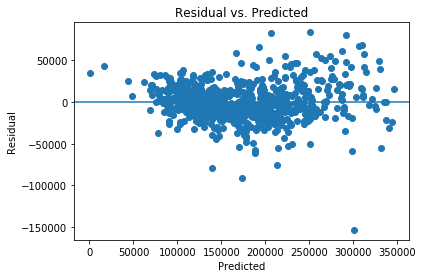

In [19]:
plt.scatter(predictions, errors)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

In [20]:
from scipy.stats import bartlett
from scipy.stats import levene

bart_stats = bartlett(predictions, errors)
lev_stats = levene(predictions, errors)

print("Bartlett test statistic value is {0:3g} and p value is {1:.3g}".format(bart_stats[0], bart_stats[1]))
print("Levene test statistic value is {0:3g} and p value is {1:.3g}".format(lev_stats[0], lev_stats[1]))

Bartlett test statistic value is 651.764 and p value is 9.24e-144
Levene test statistic value is 549.007 and p value is 9.37e-104


- The p-values of both tests are lower than 0.05. So, the test results reject the null hypothesis which means our errors are heteroscedastic.
- Heteroscedaticity may be attributed to outliers in the data or omitted variables that are important in explaining the variance of the target variable. 
- The estimated coefficients are still valid(consistent).
- Heteroscedasticity may make some estimated coefficients seem to be statistically insignificant and the reliability of some statistical tests like t-test.

### Assumption four: low multicollinearity 

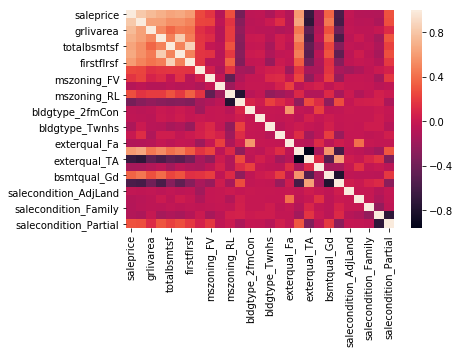

In [24]:
price_corr_df = housing_reg_df[['saleprice', 'overallqual', 'grlivarea', 'garagecars', 'totalbsmtsf', 'garagearea', 'firstflrsf'] 
                   + dummy_column_names]

sns.heatmap(price_corr_df.corr())

- If we want to know which features matter most when predicting an outcome, multicollinearity can cause us to underestimate the relationship between features and outcomes.
-  Multicollinearity can be fixed by PCA or by discarding some of the correlated features.

### Assumption five: error terms should be uncorrelated with one another

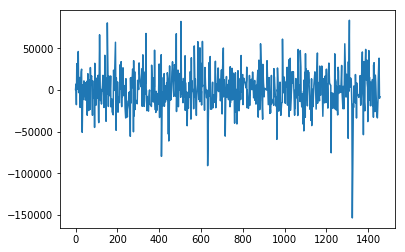

In [25]:
plt.plot(errors)
plt.show()

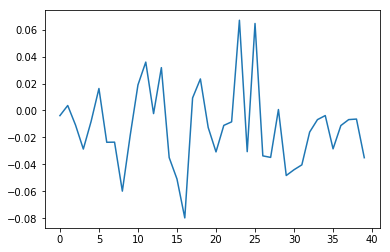

In [26]:
from statsmodels.tsa.stattools import acf

acf_data = acf(errors)

plt.plot(acf_data[1:])
plt.show()

- The error term for one observation shouldn't predict the error term for another.
- This type of serial correlation may happen if we omit a relevant variable from the model. 
- Including that variable into the model can solve for this issue.

### Assumption six: features shouldn't be correlated with the errors

- Common causes are omitted variables and simultaneous causation between independent variables and the target.
- Other causes include measurement errors or failing to measure a relevant and included explanatory variable appropriately causes a portion of the variable's effect to be embodied into the error term.
- May test exogenetiy with Durbin-Wu-Hausman test 